# K-means Tutorial

This project aims to introduce you to clustering through the K-means algorithm. This algorithm identifies clusters in data by continuously computing the mean of the closest data points. In this project we use a variant of this algorithm called mini batch K-means. The variation functions similarly to the standard K-means algorithm, but works on smaller batches of data from the entire dataset to compute the clusters.

In [1]:
# Import the necessary libraries
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define some constants for plotting
COLORS = ["red", "green", "blue", "yellow", "purple", "cyan", "black"]
CLUSTER_COLORS = ["magenta", "cyan", "black", "lime"]

## Generate data

Generate some data via the sklearn library.

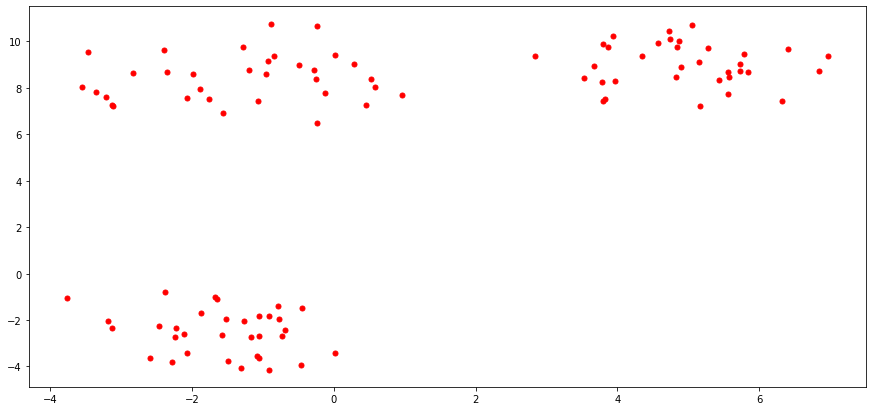

In [3]:
# We can generate a dataset with the following method
X, y = datasets.make_blobs(100)

# Set the size of the plot (width and height)
plt.figure(figsize=(15, 7))

# Scatter all points in the dataset (Transpose the dataset to make the columns
#  correspond to the x and y coordinates respectively)
plt.scatter(X.T[0], X.T[1], s=25, color = COLORS[0])

# Show the plot
plt.show()

## Plotting method

For clustering models on two dimensional data, it is often useful to plot the data visually to see how the data has been clustered, the method below does this.

In [8]:
# We want to display the clustering once the model is fit to the data
def plot_model_prediction(model, X, plt_w = 12, plt_h = 5):

  # Get prediction from the model for all data points
  preds = model.predict(X)

  # Set plot size
  plt.figure(figsize=(plt_w, plt_h))

  # For every unique cluster generated by the model
  for label in np.unique(preds):

    # Take all the data points in the cluster 'label'
    category = X[preds == label]

    # Plot them with a new color
    plt.scatter(category.T[0], category.T[1], s=25, color = COLORS[label])

  # Plot the clusters centers 
  for i, cluster in enumerate(model.cluster_centers_):
    plt.scatter(cluster[0], cluster[1], s=100, color = CLUSTER_COLORS[i])

  plt.show()

## Use the algorithm

The algorithm is easily imported and used, for more information regarding the avalable functionality of the model, look at the source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html

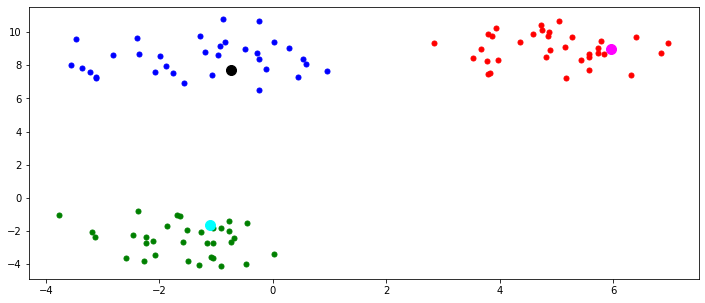

In [9]:
# Import the MiniBatchKMeans method/algorithm
from sklearn.cluster import MiniBatchKMeans

# Construct the model.
# The batch_size defines how many data points are taken in one iteration.
# Set batch_size to 1 to get the online K-means algorithm.
# Set the n_clusters parameter to the desired number of clusters.
model = MiniBatchKMeans(n_clusters= 3, batch_size=1)

# Fit the model on the training dataset X.
model.fit(X)

#Plot the clusters found by the model in the training dataset X.
plot_model_prediction(model, X)


## Algorithm results on different datasets

Here we test the algorithm trained on several different datasets. 

In [10]:
# Create a collection of diferent datasets

size = 500
data_collection = [datasets.make_circles(size, noise = 0.1),
                   datasets.make_moons(size, noise = 0.1),
                   datasets.make_blobs(size),
                   datasets.make_blobs(size)
                   ]

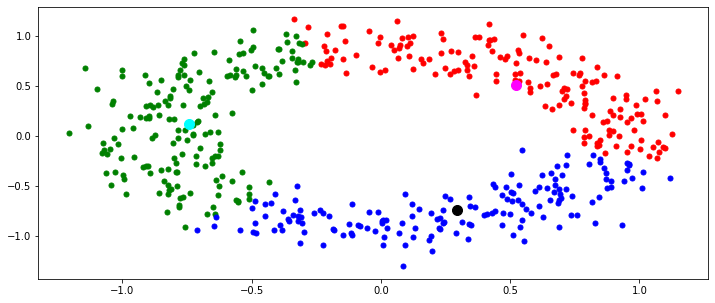

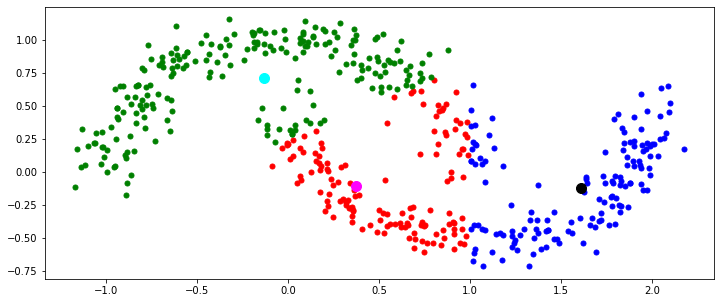

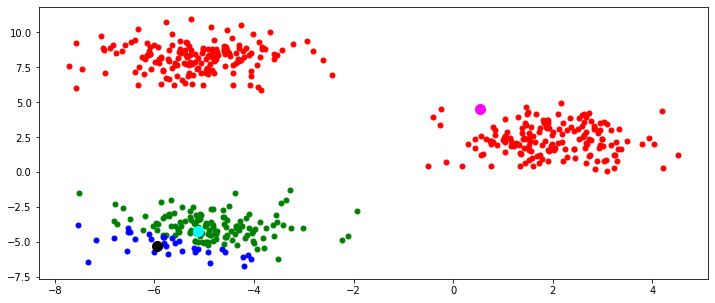

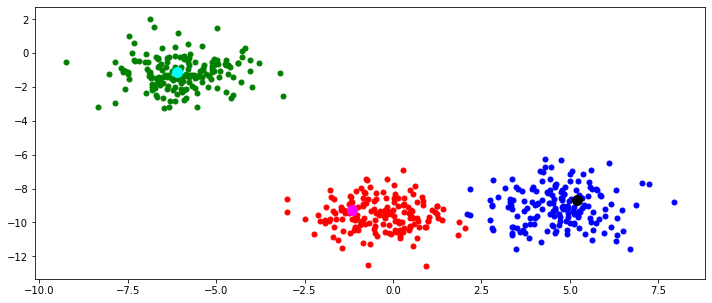

In [11]:
# Create one mini batck K-means model for each dataset, train it, and plot the clusters it found
# Suggestion: try the algorithm with different numbers of clusters. 

for (X, y) in data_collection:
  model = MiniBatchKMeans(n_clusters= 3, batch_size=1)
  model.fit(X)
  plot_model_prediction(model, X)

# K-means Project: identify the people in a set of images taken of their faces in different setups. 

In this project you will use the K-means algorithm to work on a set of images of human faces. We work with the Olivetti dataset, that contains a set of face images taken between April 1992 and April 1994 at the AT&T Laboratories Cambridge. There are ten different images of each of 40 distinct subjects. For some subjects, the images were taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). The image is quantized to 256 grey levels and stored as unsigned 8-bit integers; the loader will convert these to floating point values on the interval [0, 1], which are easier to work with for many algorithms. The original dataset consisted of 92 x 112 sized images, while the version available here consists of 64x64 images.

Your task is to attempt reconstruction the 40 people and show their headshot picture assembled on the basis of their 10 different pictures. 

In [12]:
SEED = 0

In [96]:
# Load the "Olivetti" faces dataset. 
# Do not modify the parameters of the load function!!!
faces = datasets.fetch_olivetti_faces(shuffle=True, random_state=1)

In [14]:
# The number of pictures in the dataset
faces.data.shape[0]

400

In [97]:
faces["data"]

array([[0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.6570248 , 0.6652893 , 0.69008267, ..., 0.3305785 , 0.32231405,
        0.3429752 ],
       [0.11983471, 0.11157025, 0.11570248, ..., 0.6528926 , 0.77272725,
        0.74380165],
       ...,
       [0.3677686 , 0.3677686 , 0.35123968, ..., 0.4876033 , 0.5123967 ,
        0.5495868 ],
       [0.21487603, 0.2644628 , 0.3429752 , ..., 0.45867768, 0.446281  ,
        0.446281  ],
       [0.10330579, 0.21900827, 0.17768595, ..., 0.43801653, 0.4752066 ,
        0.2768595 ]], dtype=float32)

## Explore the data

Let's visualize the 400 pictures.

In [29]:
faces.data

array([[0.6694215 , 0.6363636 , 0.6487603 , ..., 0.08677686, 0.08264463,
        0.07438017],
       [0.76859504, 0.75619835, 0.74380165, ..., 0.48347107, 0.6280992 ,
        0.6528926 ],
       [0.37190083, 0.34710744, 0.3677686 , ..., 0.7066116 , 0.6818182 ,
        0.5495868 ],
       ...,
       [0.55785125, 0.60330576, 0.6570248 , ..., 0.17768595, 0.20661157,
        0.19421488],
       [0.5206612 , 0.5206612 , 0.53305787, ..., 0.46694216, 0.43801653,
        0.43801653],
       [0.3966942 , 0.3677686 , 0.3429752 , ..., 0.37190083, 0.26859504,
        0.29752067]], dtype=float32)

In [15]:
#Creating 40X10 subplots

nrows=40
ncols=10

fig, axarr=plt.subplots(nrows, ncols, figsize=(18, 90))
  
#For easy iteration flattened 40X10 subplots matrix to 40 array
axarr=axarr.flatten() #subplots flattened
    
#iterating over 

for i in range(nrows):
  for j in range(ncols):
    index=i*ncols+j  # Correct index in the flattened array
    axarr[index].imshow(faces["data"][index].reshape(64, 64))  # Reshape data in 64 x 64 matrix and show image in an index in the subplot
    axarr[index].set_xticks([]) 
    axarr[index].set_yticks([])
    axarr[index].set_title("face id:{}".format(index))
plt.show()

Output hidden; open in https://colab.research.google.com to view.

## Train the model and present results

Let's train an online K-means model with a single cluster.

In [76]:
model = MiniBatchKMeans(n_clusters= 1, batch_size=1, random_state=SEED)
model.fit(faces.data)

MiniBatchKMeans(batch_size=1, compute_labels=True, init='k-means++',
                init_size=None, max_iter=100, max_no_improvement=10,
                n_clusters=1, n_init=3, random_state=0, reassignment_ratio=0.01,
                tol=0.0, verbose=0)

Let's visualize the center of the resulting cluster, interpreted as an image representing all the pictures in the cluster (i.e., all the pictures in the Olivetti dataset). 

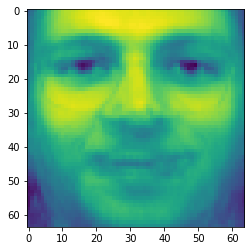

In [77]:
model.cluster_centers_.shape
plt.imshow(model.cluster_centers_.reshape(64, 64))
plt.show()

Just to compare: let's calculate the mean of all the pictures in the dataset. 

This is what the mean of all pictures in the dataset looks like:


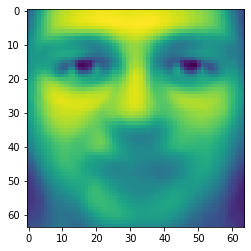

In [78]:
# Mean of the pixel poistions
print("This is what the mean of all pictures in the dataset looks like:")
plt.imshow(np.mean(faces["data"], axis = 0).reshape(64, 64))
plt.show()

##Your task: train an online K-means algorithm with the suitable number of clusters to identify the individuals in the dataset.

###Q1. How many clusters do you use?

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=3 should be larger than k=40. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=3 should be larger than k=40. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=3 should be larger than k=40. Setting it to 3*k
  init_size=init_size)


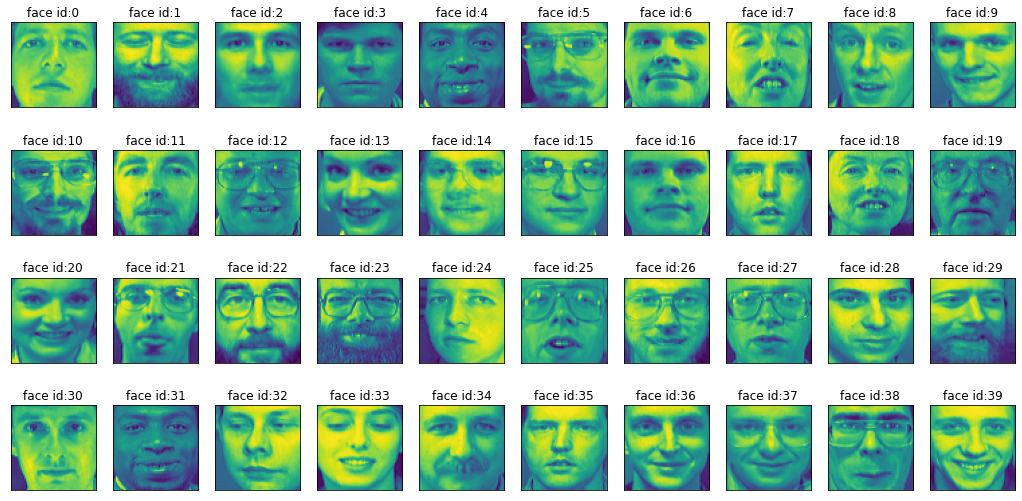

In [82]:
# Write your code here
# Set the random_state parameter in the model initialization to constant SEED (for verifiability purposes)

model = MiniBatchKMeans(n_clusters= 40, batch_size=1, random_state=SEED)
model.fit(faces.data)


# Use the code below to visualize the centers of the clusters
# Choose yourself the number of rows and columns in the visualization of the result

nrows=4
ncols=10
fig, axarr=plt.subplots(nrows, ncols, figsize=(18, 9))
  
#For easy iteration flatten the matrix of pictures
axarr=axarr.flatten()
    
#iterating over 

for i in range(nrows):
  for j in range(ncols):
    index=i*ncols+j
    axarr[index].imshow(model.cluster_centers_[index].reshape(64, 64))
    axarr[index].set_xticks([])
    axarr[index].set_yticks([])
    axarr[index].set_title("face id:{}".format(index))
plt.show()

###Q2. The subject with "face id: 10" in the result: is it a man or a woman

It has moustache and beard, so very likely a male.

###Q3. The subject with "face id: 5" in the result: does he/she wear glasses?

Yes

###Q4. Re-run the model with a different shuffling of the pictures (done in the load function). Are the pictures you got the same (even if in a different order)? In other words, is the algorithm robust to the order of the pictures in the dataset?

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=3 should be larger than k=40. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=3 should be larger than k=40. Setting it to 3*k
  init_size=init_size)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1576: RuntimeWarning: init_size=3 should be larger than k=40. Setting it to 3*k
  init_size=init_size)


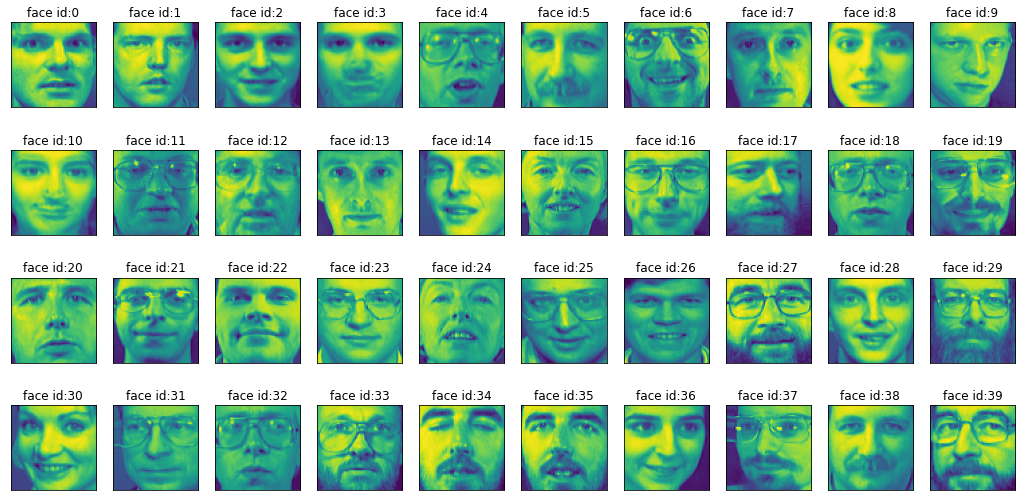

In [98]:
# Write your code here
# Set the random_state parameter in the model initialization to constant SEED (for verifiability purposes)

model = MiniBatchKMeans(n_clusters= 40, batch_size=1, random_state=SEED)
model.fit(faces.data)


# Use the code below to visualize the centers of the clusters
# Choose yourself the number of rows and columns in the visualization of the result

nrows=4
ncols=10
fig, axarr=plt.subplots(nrows, ncols, figsize=(18, 9))
  
#For easy iteration flatten the matrix of pictures
axarr=axarr.flatten()
    
#iterating over 

for i in range(nrows):
  for j in range(ncols):
    index=i*ncols+j
    axarr[index].imshow(model.cluster_centers_[index].reshape(64, 64))
    axarr[index].set_xticks([])
    axarr[index].set_yticks([])
    axarr[index].set_title("face id:{}".format(index))
plt.show()

It gives totally differeny results (with shuffling seed set to 1).

In [99]:
from sklearn.cluster import KMeans


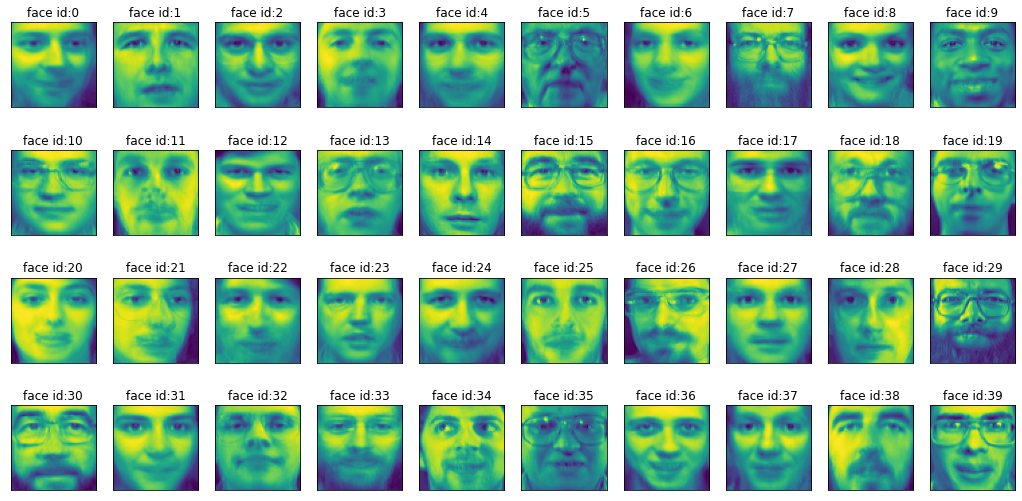

In [101]:
# Write your code here
# Set the random_state parameter in the model initialization to constant SEED (for verifiability purposes)

model = KMeans(n_clusters= 40, random_state=SEED)
model.fit(faces.data)


# Use the code below to visualize the centers of the clusters
# Choose yourself the number of rows and columns in the visualization of the result

nrows=4
ncols=10
fig, axarr=plt.subplots(nrows, ncols, figsize=(18, 9))
  
#For easy iteration flatten the matrix of pictures
axarr=axarr.flatten()
    
#iterating over 

for i in range(nrows):
  for j in range(ncols):
    index=i*ncols+j
    axarr[index].imshow(model.cluster_centers_[index].reshape(64, 64))
    axarr[index].set_xticks([])
    axarr[index].set_yticks([])
    axarr[index].set_title("face id:{}".format(index))
plt.show()